In [2]:
# add folders to Python's search space
import os, sys
from pathlib import Path
script_dir = Path(os.path.dirname(os.path.abspath('')))
module_dir = str(script_dir.parent)
sys.path.insert(0, module_dir + '/modules')
print(module_dir)

# import the rest of the modules
%matplotlib nbagg
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
import arch
import pandas as pd
import tensorflow_probability as tfp
import time  
import sim
import compare
from scipy.special import erf
DTYPE = 'float32'

C:\Users\pinak\Documents\GitHub\sphere-fp


In [4]:
# load learned solution
dim = 2
net = arch.LSTMForgetNet(50, 3, tf.float32, name="sphere{}D".format(dim))
net.load_weights('../../data/{}D/{}'.format(dim, net.name)).expect_partial()
X = tf.random.uniform(shape=(10, dim))
net(*tf.split(X, dim, axis=-1))

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.019128  ],
       [1.0156754 ],
       [0.70554143],
       [0.58542734],
       [0.11292545],
       [0.945581  ],
       [0.8562343 ],
       [0.5449567 ],
       [0.8674527 ],
       [0.9765137 ]], dtype=float32)>

In [6]:
# define the true solution
D = 1.0
def p_inf(x, y):
  Z = 0.5 * np.sqrt(np.pi**3 * D) * (1. + erf(1/np.sqrt(D)))
  return tf.exp(-(x**2 + y**2 - 1.)**2 / D) / Z

In [10]:
# set up plotting parameters
xlabel_size = ylabel_size = 15
tick_size = 10 
legend_size = 15
title_size = 15

<IPython.core.display.Javascript object>


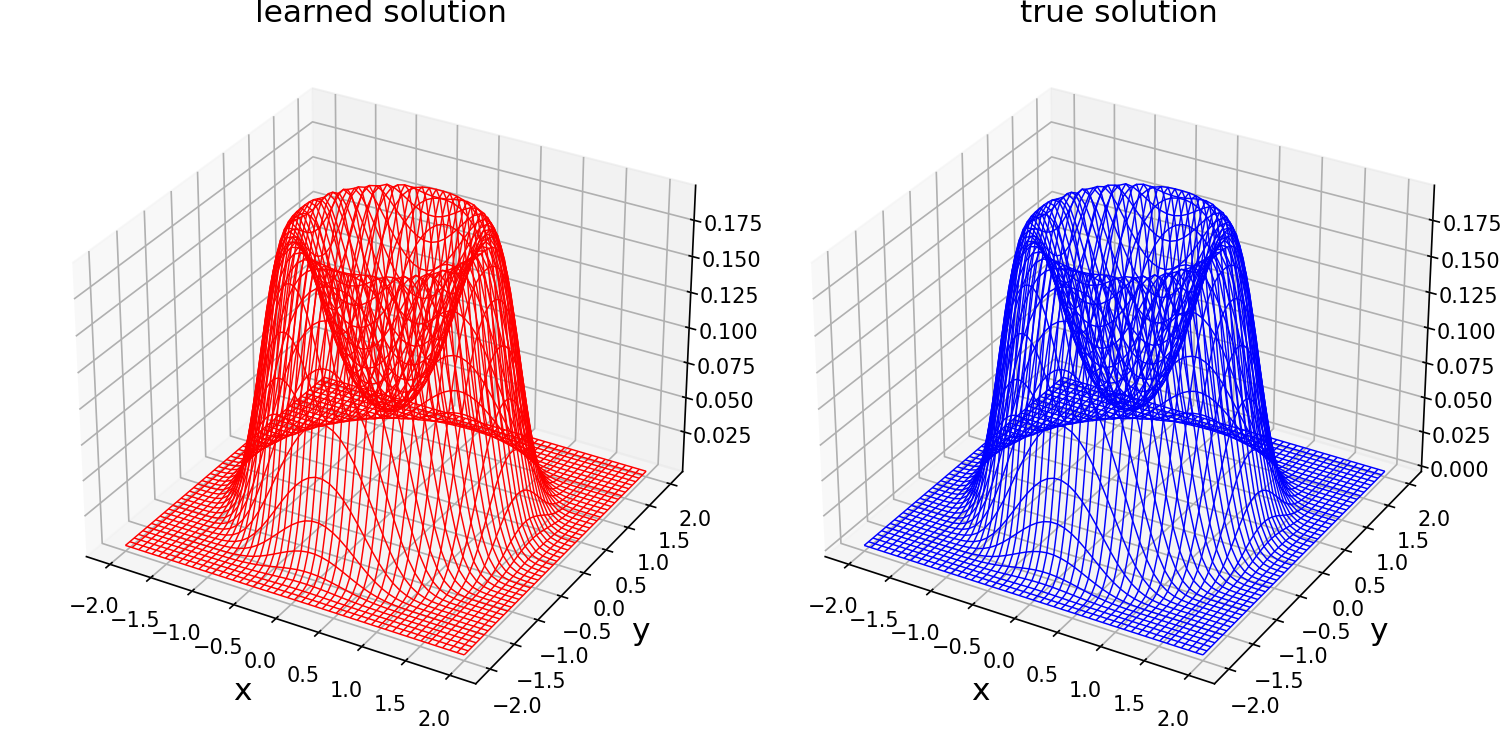

In [21]:
# plot solutions
def plot_solutions(learned, true, filename, resolution=50, low=[-2., -2], high=[2., 2.]):
  fig = plt.figure(figsize=(10, 5))
  ax_l = fig.add_subplot(121, projection='3d')
  ax_t = fig.add_subplot(122, projection='3d')
  # plotting params  
  ax_l.tick_params(axis='both', which='major', labelsize=tick_size)
  ax_l.tick_params(axis='both', which='minor', labelsize=tick_size)
  ax_l.set_title('learned solution', fontsize=title_size)
  ax_l.set_xlabel('x', fontsize=xlabel_size)
  ax_l.set_ylabel('y', fontsize=ylabel_size)
    
  ax_t.tick_params(axis='both', which='major', labelsize=tick_size)
  ax_t.tick_params(axis='both', which='minor', labelsize=tick_size)
  ax_t.set_title('true solution', fontsize=title_size)
  ax_t.set_xlabel('x', fontsize=xlabel_size)
  ax_t.set_ylabel('y', fontsize=ylabel_size)
    
  delta = (high[0] - low[0]) * (high[1] - low[1]) / (resolution-1)**2
  
  x = np.linspace(low[0], high[0], num=resolution, endpoint=True).astype(DTYPE)
  y = np.linspace(low[1], high[1], num=resolution, endpoint=True).astype(DTYPE)
  y = np.repeat(y, resolution, axis=0).reshape((-1, 1))
  x = np.array(list(x) * resolution).reshape((-1, 1))
  z_l = learned(x, y).numpy()
  z_l /= (z_l.sum() * delta) 
  z_t = true(x, y).numpy()
  grid = (resolution, resolution)
  x = x.reshape(grid)
  y = y.reshape(grid)
  z_l = z_l.reshape(grid)
  z_t = z_t.reshape(grid)
  ax_l.plot_wireframe(x, y, z_l, color='red', linewidth=0.7)
  ax_t.plot_wireframe(x, y, z_t, color='blue', linewidth=0.7)
  plt.tight_layout()
  plt.savefig('{}.png'.format(filename), dpi=300)
  plt.show()
  

plot_solutions(learned=lambda *args: tf.exp(net(*args)), true=p_inf, filename='../../plots/2D-surface')